### Image Classification using Logistic Regression

In [171]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [172]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [173]:
dataset = MNIST(root='data/', download=True)

In [174]:
len(dataset)

60000

In [175]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [176]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F0F19C33940>, 5)

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


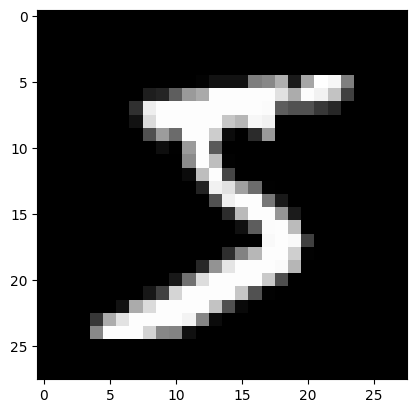

In [178]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


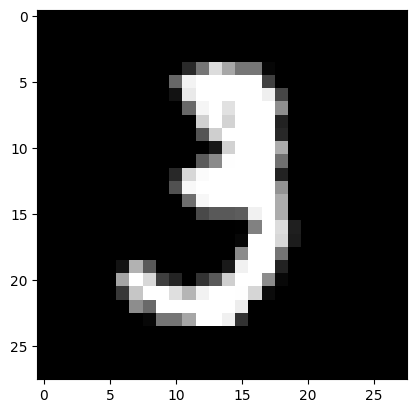

In [179]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [180]:
import torchvision.transforms as transforms

In [181]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [182]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [183]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


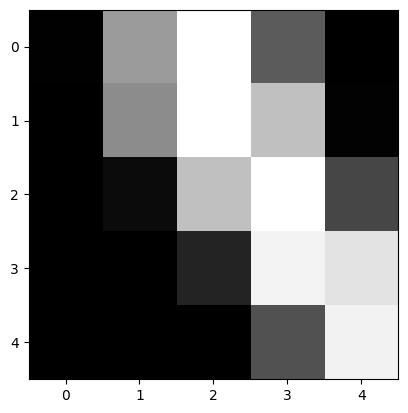

In [184]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [185]:
import numpy as np 

def split_indices(n, val_pct):
    n_val = int(val_pct*n)

    indxs = np.random.permutation(n)

    return indxs[n_val:], indxs[:n_val]

In [186]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [187]:
print(len(train_indices), len(val_indices))
print('Sample validation indices: ', val_indices[:20])

48000 12000
Sample validation indices:  [12628 24113 37235 59711 25563   763 16432  8632 13662 16797 35388 44471
 13342 40168 32848 20309 56293 30803 55144 41086]


In [188]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [189]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

### Defining the model: Logistic Regression Model

In [190]:
import torch.nn as nn
# each image will be flattened out into a vector of size 784 i.e., 28*28 
# and the output vector size will be 10 with each vector element signifying the probability of a target label

In [191]:
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [192]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0292, -0.0076,  0.0095,  ...,  0.0271, -0.0342,  0.0289],
        [ 0.0006,  0.0083,  0.0109,  ...,  0.0296,  0.0355, -0.0112],
        [ 0.0067,  0.0269, -0.0059,  ..., -0.0334,  0.0227,  0.0022],
        ...,
        [ 0.0156, -0.0087,  0.0204,  ...,  0.0275, -0.0186,  0.0278],
        [-0.0318, -0.0288,  0.0062,  ..., -0.0153,  0.0315, -0.0315],
        [ 0.0069,  0.0329, -0.0279,  ..., -0.0067, -0.0215,  0.0146]],
       requires_grad=True)

In [193]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0318, -0.0052, -0.0247, -0.0344,  0.0283, -0.0072, -0.0191,  0.0064,
        -0.0278,  0.0068], requires_grad=True)

In [194]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([6, 3, 8, 2, 9, 6, 1, 6, 2, 1, 6, 6, 5, 8, 7, 5, 4, 9, 6, 0, 6, 7, 5, 3,
        1, 7, 6, 8, 2, 6, 0, 4, 6, 4, 6, 8, 5, 6, 0, 2, 7, 4, 9, 7, 4, 5, 2, 8,
        4, 0, 2, 3, 6, 9, 9, 5, 9, 4, 1, 4, 2, 8, 9, 5, 6, 4, 8, 1, 8, 2, 3, 2,
        2, 6, 0, 9, 3, 8, 9, 9, 3, 3, 3, 8, 7, 9, 6, 1, 8, 2, 4, 0, 2, 2, 2, 4,
        6, 1, 8, 4])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [ ]:
## we recieved the error as the vector was of form 1*28*28 and the expected was of 784 so it needs to be flattened out and
## for the same the .reshape function would be used

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape: ', outputs.shape)
print('Sample outputs:\n', outputs[:2].data)

outputs.shape:  torch.Size([100, 10])
Sample outputs:
 tensor([[ 0.1173, -0.1005,  0.1350,  0.0353, -0.0562,  0.0943, -0.0961, -0.0878,
          0.0696, -0.0129],
        [ 0.2484,  0.0776,  0.2326, -0.1506,  0.0451, -0.0192,  0.0833, -0.0288,
          0.1130, -0.0522]])


In [ ]:
import torch.nn.functional as F

In [ ]:
outputs[:2]

tensor([[ 0.1173, -0.1005,  0.1350,  0.0353, -0.0562,  0.0943, -0.0961, -0.0878,
          0.0696, -0.0129],
        [ 0.2484,  0.0776,  0.2326, -0.1506,  0.0451, -0.0192,  0.0833, -0.0288,
          0.1130, -0.0522]], grad_fn=<SliceBackward0>)

In [ ]:
probs = F.softmax(outputs, dim=1)

print('Sample probabilities:\n', probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1109, 0.0892, 0.1129, 0.1022, 0.0933, 0.1084, 0.0896, 0.0904, 0.1058,
         0.0974],
        [0.1205, 0.1016, 0.1186, 0.0808, 0.0983, 0.0922, 0.1022, 0.0913, 0.1052,
         0.0892]])
Sum:  1.0


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 0, 6, 2, 6, 8, 6, 2, 6, 5, 6, 9, 0, 0, 2, 5, 6, 2, 5, 5, 8, 5, 0, 6,
        0, 5, 8, 2, 5, 5, 8, 5, 6, 0, 0, 6, 6, 1, 5, 0, 5, 6, 1, 9, 0, 0, 5, 0,
        5, 2, 5, 6, 0, 5, 5, 6, 2, 0, 5, 5, 2, 6, 0, 5, 6, 6, 5, 5, 2, 6, 5, 0,
        6, 2, 7, 6, 2, 5, 2, 5, 5, 2, 5, 0, 5, 0, 5, 9, 6, 5, 9, 5, 6, 6, 5, 2,
        6, 6, 6, 6])
tensor([0.1129, 0.1205, 0.1457, 0.1128, 0.1335, 0.1249, 0.1309, 0.1417, 0.1144,
        0.1306, 0.1358, 0.1262, 0.1254, 0.1111, 0.1423, 0.1289, 0.1280, 0.1384,
        0.1360, 0.1372, 0.1237, 0.1478, 0.1279, 0.1276, 0.1535, 0.1602, 0.1340,
        0.1234, 0.1288, 0.1571, 0.1156, 0.1232, 0.1430, 0.1248, 0.1345, 0.1449,
        0.1176, 0.1258, 0.1270, 0.1403, 0.1190, 0.1388, 0.1194, 0.1178, 0.1220,
        0.1200, 0.1332, 0.1610, 0.1472, 0.1078, 0.1307, 0.1156, 0.1286, 0.1361,
        0.1390, 0.1293, 0.1288, 0.1256, 0.1402, 0.1541, 0.1285, 0.1288, 0.1231,
        0.1262, 0.1224, 0.1313, 0.1429, 0.1254, 0.1232, 0.1315, 0.1290, 0.1116,
        0.1261, 0.1

In [ ]:
labels

tensor([9, 8, 8, 9, 7, 7, 0, 6, 0, 7, 2, 7, 2, 8, 1, 1, 5, 5, 5, 1, 6, 9, 6, 6,
        6, 0, 1, 7, 0, 5, 5, 6, 6, 1, 8, 1, 1, 0, 6, 4, 7, 4, 2, 6, 0, 6, 4, 9,
        9, 4, 6, 3, 5, 6, 9, 9, 5, 4, 5, 2, 8, 6, 2, 4, 8, 4, 0, 7, 8, 1, 0, 3,
        4, 8, 9, 6, 8, 0, 5, 2, 4, 9, 8, 1, 8, 3, 9, 1, 2, 9, 8, 9, 6, 1, 3, 7,
        8, 4, 9, 6])

In [ ]:
# adjusting weights with gradient descent

In [ ]:
torch.sum(preds == labels).item() / len(labels)

0.1

In [195]:
def accuracy(outputs, labels):
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [196]:
accuracy(preds, labels)

tensor(0.0800)

In [197]:
loss_fn = F.cross_entropy

In [198]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3388, grad_fn=<NllLossBackward0>)


In [199]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):

    preds= model(xb)
    loss = loss_func(preds, yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    metric_result = None

    if metric_result is not None:
        metric_result = metric(preds, yb)

    return loss.item(), len(xb), metric_result

In [200]:
def evaluate(model, loss_fn, valid_dl, metric = None):
    with torch.no_grad():
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb, yb in valid_dl]
        losses, nums, metrics = zip(*results)

        total = np.sum(nums)

        avg_loss = np.sum(np.multiply(losses, nums)) / total

        avg_metric = None

        if metric is not None:
            avg_metric = np.sum(np.multiply(metric, nums)) / total

    return avg_loss, total, avg_metric

In [201]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [202]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history